In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set display options for high precision as requested
pd.set_option('display.precision', 15)
pd.set_option('display.width', 150)
pd.set_option('display.max_columns', None)

# Runge-Kutta Methods

1. General Runge-Kutta Form

An $s$-stage Runge-Kutta method for solving $y' = f(x,y)$ is defined as:
$$y_{n+1} = y_n + \sum_{i=1}^{s} b_i k_i$$
Where the slopes $k_i$ are:
$$k_i = h f(x_n + c_i h, y_n + \sum_{j=1}^{i-1} a_{ij} k_j)$$

**Parameters to determine:**
* $b_i$: Weights for the final summation.
* $c_i$: Nodes (fraction of the step $h$).
* $a_{ij}$: The Runge-Kutta Matrix (interaction between stages).

---

2. Stability Criteria
To analyze stability, we apply the method to the test equation $y' = \lambda y$.
* **Stability Polynomial:** $y_{n+1} = R(z) y_n$, where $z = h\lambda$.
* **Condition:** The method is stable if $|R(z)| \le 1$.

## RK2

Derivation of RK2 (2nd Order)

**Goal:** Match Taylor Series expansion up to $O(h^2)$.

a. The System of Equations (Order Conditions)
Comparing the Taylor series of the exact solution $y(x+h)$ with the method's expansion yields 3 constraints for 4 unknowns ($b_1, b_2, c_2, a_{21}$):
1.  **Order 1:** $b_1 + b_2 = 1$
2.  **Order 2:** $b_2 c_2 = \frac{1}{2}$
3.  **Order 2:** $b_2 a_{21} = \frac{1}{2}$

*(Note: We typically assume $c_i = \sum a_{ij}$, so $c_2 = a_{21}$, making equation 2 and 3 identical.)*

b. The Choice (Heun's Method)
Since the system is under-determined (3 eqs, 4 unknowns), we make a choice:
* **Choose:** $c_2 = 1$ (Take the slope at the very end of the interval).
* **Result:**
    * From (2): $b_2(1) = 1/2 \implies b_2 = 1/2$.
    * From (1): $b_1 + 1/2 = 1 \implies b_1 = 1/2$.
    * From (3): $a_{21} = c_2 = 1$.

c. Final RK2 Algorithm (Heun)
$$
\begin{aligned}
k_1 &= h f(x_n, y_n) \\
k_2 &= h f(x_n + h, y_n + k_1) \\
y_{n+1} &= y_n + \frac{1}{2}(k_1 + k_2)
\end{aligned}
$$

--------------------

RK2 Stability

**Polynomial:**
$$R_{RK2}(z) = 1 + z + \frac{z^2}{2}$$
**Region:**
* Matches the first 3 terms of the Taylor series of $e^z$.
* **Real Axis Interval:** $[-2, 0]$

In [3]:
def generate_rk2_tableau(alpha2):
    """
    Derives the RK2 Butcher Tableau weights (r) and matrix (beta) 
    given the custom node alpha2.
    Based on Order Conditions from '26_Các phương pháp Runge – Kutta 20251.pdf' (Page 10).
    """
    print(f"--- Generating RK2 Tableau for node: alpha2={alpha2} ---")
    
    if alpha2 == 0:
        print("Error: alpha2 cannot be 0 for a 2nd-order method (division by zero in derivation).")
        return None

    # 1. Solve for Weights (r1, r2)
    # Equation 2: r2 * alpha2 = 1/2  => r2 = 1 / (2 * alpha2)
    r2 = 1.0 / (2 * alpha2)
    
    # Equation 1: r1 + r2 = 1
    r1 = 1.0 - r2

    # 2. Solve for Matrix Coefficients (beta)
    # Equation 3: r2 * beta11 = 1/2
    # Since r2 = 1/(2*alpha2), substituting gives: (1/(2*alpha2)) * beta11 = 1/2 => beta11 = alpha2
    beta11 = alpha2
    
    # 3. Construct the Butcher Tableau
    #   0  |
    #   a2 | b11
    #   ----------------
    #      | r1   r2
    
    tableau = {
        'nodes': np.array([0, alpha2]),
        'weights': np.array([r1, r2]),
        'matrix': np.array([
            [0, 0],       # Row 1 (k1)
            [beta11, 0]   # Row 2 (k2)
        ])
    }
    
    # Print Tableau
    print("\n[Butcher Tableau Result]")
    print(f"{0:<5} |")
    print(f"{alpha2:<5.4f} | {beta11:.4f}")
    print("-" * 20)
    print(f"      | {r1:.4f}  {r2:.4f}")
    
    return tableau

def print_rk2_algorithm(tableau):
    """
    Prints the raw mathematical algorithm based on the generated tableau.
    """
    if tableau is None: return

    r = tableau['weights']
    b = tableau['matrix']
    a = tableau['nodes']
    
    print("\n" + "="*30)
    print(" RAW MARKDOWN ALGORITHM ")
    print("="*30)
    
    md = f"""
### Generalized Runge-Kutta 2 Algorithm (Derived)

**Input:** $x_n, y_n, h, f(x,y)$

**Step 1: Calculate Slopes ($k_i$)**
* $k_1 = h \\cdot f(x_n, y_n)$
* $k_2 = h \\cdot f(x_n + {a[1]:.4g}h, y_n + {b[1,0]:.4g}k_1)$

**Step 2: Update Solution ($y_{{n+1}}$)**
$$y_{{n+1}} = y_n + {r[0]:.4g}k_1 + {r[1]:.4g}k_2$$

**Output:** $y_{{n+1}}$
"""
    print(md)

In [4]:
# --- EXECUTION ---

# Example 1: Heun's Method (Trapezoidal) -> alpha2 = 1 [cite: 47]
tableau_heun = generate_rk2_tableau(alpha2=1)
print_rk2_algorithm(tableau_heun)

# Example 2: Midpoint Method -> alpha2 = 1/2 [cite: 48]
#tableau_midpoint = generate_rk2_tableau(alpha2=0.5)
#print_rk2_algorithm(tableau_midpoint)

# Example 3: Ralston's Method (Minimum Error Bound) -> alpha2 = 2/3
#tableau_ralston = generate_rk2_tableau(alpha2=2/3)
#print_rk2_algorithm(tableau_ralston)

--- Generating RK2 Tableau for node: alpha2=1 ---

[Butcher Tableau Result]
0     |
1.0000 | 1.0000
--------------------
      | 0.5000  0.5000

 RAW MARKDOWN ALGORITHM 

### Generalized Runge-Kutta 2 Algorithm (Derived)

**Input:** $x_n, y_n, h, f(x,y)$

**Step 1: Calculate Slopes ($k_i$)**
* $k_1 = h \cdot f(x_n, y_n)$
* $k_2 = h \cdot f(x_n + 1h, y_n + 1k_1)$

**Step 2: Update Solution ($y_{n+1}$)**
$$y_{n+1} = y_n + 0.5k_1 + 0.5k_2$$

**Output:** $y_{n+1}$



## RK3

Derivation of RK3 (3rd Order)

**Goal:** Match Taylor Series expansion up to $O(h^3)$.

a. The System of Equations
Matching terms up to $h^3$ yields 4 constraints for 6 unknowns ($b_1, b_2, b_3, c_2, c_3, a_{32}$):
1.  $\sum b_i = 1 \implies b_1 + b_2 + b_3 = 1$
2.  $\sum b_i c_i = 1/2 \implies b_2 c_2 + b_3 c_3 = 1/2$
3.  $\sum b_i c_i^2 = 1/3 \implies b_2 c_2^2 + b_3 c_3^2 = 1/3$
4.  $\sum_{ij} b_i a_{ij} c_j = 1/6 \implies b_3 a_{32} c_2 = 1/6$

b. The Choice (Kutta's 3rd Order)
We have 2 degrees of freedom. Standard practice is to space nodes evenly:
* **Choose:** $c_2 = 1/2, c_3 = 1$.
* **Solving:**
    * Substitute $c$'s into (4): $b_3 a_{32} (1/2) = 1/6 \implies b_3 a_{32} = 1/3$.
    * Solve (2) & (3) for weights: Results in $b_1 = 1/6, b_2 = 2/3, b_3 = 1/6$.
    * Solve for matrix: $a_{32} = 2$, which implies $a_{31} = c_3 - a_{32} = 1 - 2 = -1$.

c. Final RK3 Algorithm
$$
\begin{aligned}
k_1 &= h f(x_n, y_n) \\
k_2 &= h f(x_n + \frac{h}{2}, y_n + \frac{k_1}{2}) \\
k_3 &= h f(x_n + h, y_n - k_1 + 2k_2) \\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 4k_2 + k_3)
\end{aligned}
$$

--------------

RK3 Stability

**Polynomial:**
$$R_{RK3}(z) = 1 + z + \frac{z^2}{2} + \frac{z^3}{6}$$
**Region:**
* Matches the first 4 terms of the Taylor series of $e^z$.
* **Real Axis Interval:** Approx $[-2.51, 0]$
* Includes a small portion of the imaginary axis.

In [5]:
import numpy as np
import pandas as pd

pd.set_option('display.precision', 6)
pd.set_option('display.width', 150)

def generate_rk3_tableau(alpha2, alpha3):
    """
    Derives the RK3 Butcher Tableau weights (r) and matrix (beta) 
    given two custom nodes alpha2 and alpha3.
    Based on Order Conditions from '26_Các phương pháp Runge – Kutta 20251.pdf' (Page 13).
    """
    print(f"--- Generating RK3 Tableau for nodes: alpha2={alpha2}, alpha3={alpha3} ---")

    # 1. Solve for Weights (r1, r2, r3)
    # The system of linear equations for 3rd order accuracy:
    # Eq 1: r1 + r2 + r3 = 1
    # Eq 2: r2*a2 + r3*a3 = 1/2
    # Eq 3: r2*a2^2 + r3*a3^2 = 1/3  (derived from 1/2 * sum(r * a^2) = 1/6)
    
    A = np.array([
        [1, 1, 1],
        [0, alpha2, alpha3],
        [0, alpha2**2, alpha3**2]
    ], dtype=float)
    
    b = np.array([1, 0.5, 1/3], dtype=float)
    
    try:
        r = np.linalg.solve(A, b)
        r1, r2, r3 = r
    except np.linalg.LinAlgError:
        print("Error: The chosen nodes result in a singular matrix. Cannot derive a unique RK3 method.")
        return None

    # 2. Solve for Matrix Coefficients (beta)
    # Critical coupling equation (Page 13): r3 * beta22 * alpha2 = 1/6
    if r3 == 0 or alpha2 == 0:
        print("Error: r3 or alpha2 is zero, cannot solve coupling equation r3 * beta22 * alpha2 = 1/6.")
        return None
        
    beta22 = 1 / (6 * r3 * alpha2)
    
    # Use Row Sum assumption (alpha_i = sum(beta_ij))
    # Row 2 (index 1): beta11 = alpha2 (since explicit, only one prev term)
    beta11 = alpha2 
    
    # Row 3 (index 2): beta21 + beta22 = alpha3
    beta21 = alpha3 - beta22
    
    # 3. Construct the Butcher Tableau
    #   0  |
    #   a2 | b11
    #   a3 | b21  b22
    #   ----------------
    #      | r1   r2   r3
    
    tableau = {
        'nodes': np.array([0, alpha2, alpha3]),
        'weights': r,
        'matrix': np.array([
            [0, 0, 0],       # Row 1 (k1)
            [beta11, 0, 0],  # Row 2 (k2)
            [beta21, beta22, 0] # Row 3 (k3)
        ])
    }
    
    # Print Tableau
    print("\n[Butcher Tableau Result]")
    print(f"{0:<5} |")
    print(f"{alpha2:<5.4f} | {beta11:.4f}")
    print(f"{alpha3:<5.4f} | {beta21:.4f}  {beta22:.4f}")
    print("-" * 20)
    print(f"      | {r1:.4f}  {r2:.4f}  {r3:.4f}")
    
    return tableau

def print_rk3_algorithm(tableau):
    """
    Prints the raw mathematical algorithm based on the generated tableau.
    """
    if tableau is None: return

    r = tableau['weights']
    b = tableau['matrix']
    a = tableau['nodes']
    
    print("\n" + "="*30)
    print(" RAW MARKDOWN ALGORITHM ")
    print("="*30)
    
    md = f"""
### Generalized Runge-Kutta 3 Algorithm (Derived)

**Input:** $x_n, y_n, h, f(x,y)$

**Step 1: Calculate Slopes ($k_i$)**
* $k_1 = h \\cdot f(x_n, y_n)$
* $k_2 = h \\cdot f(x_n + {a[1]:.4g}h, y_n + {b[1,0]:.4g}k_1)$
* $k_3 = h \\cdot f(x_n + {a[2]:.4g}h, y_n + {b[2,0]:.4g}k_1 + {b[2,1]:.4g}k_2)$

**Step 2: Update Solution ($y_{{n+1}}$)**
$$y_{{n+1}} = y_n + {r[0]:.4g}k_1 + {r[1]:.4g}k_2 + {r[2]:.4g}k_3$$

**Output:** $y_{{n+1}}$
"""
    print(md)

In [6]:
# --- EXECUTION ---
# Example 1: Heun's RK3 (Nodes: 1/3, 2/3) - As seen on Page 15
tableau_heun = generate_rk3_tableau(alpha2=1/3, alpha3=2/3)
print_rk3_algorithm(tableau_heun)

# Example 2: Classic RK3/Simpson (Nodes: 1/2, 1) - As seen on Page 14
#tableau_classic = generate_rk3_tableau(alpha2=1/2, alpha3=1)
#print_rk3_algorithm(tableau_classic)

--- Generating RK3 Tableau for nodes: alpha2=0.3333333333333333, alpha3=0.6666666666666666 ---

[Butcher Tableau Result]
0     |
0.3333 | 0.3333
0.6667 | 0.0000  0.6667
--------------------
      | 0.2500  0.0000  0.7500

 RAW MARKDOWN ALGORITHM 

### Generalized Runge-Kutta 3 Algorithm (Derived)

**Input:** $x_n, y_n, h, f(x,y)$

**Step 1: Calculate Slopes ($k_i$)**
* $k_1 = h \cdot f(x_n, y_n)$
* $k_2 = h \cdot f(x_n + 0.3333h, y_n + 0.3333k_1)$
* $k_3 = h \cdot f(x_n + 0.6667h, y_n + 0k_1 + 0.6667k_2)$

**Step 2: Update Solution ($y_{n+1}$)**
$$y_{n+1} = y_n + 0.25k_1 + 8.327e-17k_2 + 0.75k_3$$

**Output:** $y_{n+1}$



## RK4


Derivation of RK4 (4th Order)

**Goal:** Match Taylor Series expansion up to $O(h^4)$.

a. The System of Equations
Matching terms up to $h^4$ yields 8 constraints for 13 unknowns. The complexity increases due to higher-order derivative terms.
1.  $b_1 + b_2 + b_3 + b_4 = 1$
2.  $b_2 c_2 + b_3 c_3 + b_4 c_4 = 1/2$
3.  $b_2 c_2^2 + b_3 c_3^2 + b_4 c_4^2 = 1/3$
4.  $b_3 a_{32} c_2 + b_4 (a_{42} c_2 + a_{43} c_3) = 1/6$
5.  $b_2 c_2^3 + b_3 c_3^3 + b_4 c_4^3 = 1/4$
6.  $b_3 c_3 a_{32} c_2 + b_4 c_4 (a_{42} c_2 + a_{43} c_3) = 1/8$
7.  $b_3 a_{32} c_2^2 + b_4 (a_{42} c_2^2 + a_{43} c_3^2) = 1/12$
8.  $b_4 a_{43} a_{32} c_2 = 1/24$

b. The Choice (The "Classic" Constraints)
To solve this massive system, Runge and Kutta applied symmetry and simplicity constraints:
* **Symmetry Constraints:** $c_2 = 1/2, c_3 = 1/2, c_4 = 1$.
* **Weight Constraints:** $b_2 = b_3$.
* **Matrix Constraints:** Simple dependence (e.g., $a_{31}=0, a_{41}=0, a_{42}=0$).

**Solving the system with these choices yields:**
* $b_1 = 1/6, b_2 = 1/3, b_3 = 1/3, b_4 = 1/6$.
* $a_{21} = 1/2$.
* $a_{32} = 1/2$.
* $a_{43} = 1$.

c. Final RK4 Algorithm (Classic)
$$
\begin{aligned}
k_1 &= h f(x_n, y_n) \\
k_2 &= h f(x_n + \frac{h}{2}, y_n + \frac{k_1}{2}) \\
k_3 &= h f(x_n + \frac{h}{2}, y_n + \frac{k_2}{2}) \\
k_4 &= h f(x_n + h, y_n + k_3) \\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}
$$

---------------------

RK4 Stability

**Polynomial:**
$$R_{RK4}(z) = 1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24}$$
**Region:**
* Matches the first 5 terms of the Taylor series of $e^z$.
* **Real Axis Interval:** Approx $[-2.78, 0]$
* Offers the largest stability region among these explicit methods.


In [7]:
import numpy as np
import pandas as pd

pd.set_option('display.precision', 6)

def generate_robust_rk4(alpha2, alpha3, alpha4):
    """
    Derives RK4 Butcher Tableau for ANY nodes, including the singular 'Classic' case
    where alpha2 == alpha3.
    """
    print(f"--- Generating RK4 for nodes: [{alpha2}, {alpha3}, {alpha4}] ---")
    
    # --- STEP 1: Solve for Weights (r) ---
    # Standard System: sum(r*a^k) = 1/(k+1)
    # Check for singularity (Duplicate nodes)
    if abs(alpha2 - alpha3) < 1e-9:
        # SINGULAR CASE (e.g., Classic RK4: 0.5, 0.5, 1.0)
        # We assume symmetry: r2 = r3
        # Reduced system for (r1, r_sum, r4) where r_sum = r2 + r3
        
        # Eqs:
        # 1) r1 + r_sum + r4 = 1
        # 2) r_sum * a2 + r4 * a4 = 1/2
        # 3) r_sum * a2^2 + r4 * a4^2 = 1/3
        
        A_reduced = np.array([
            [1, 1, 1],
            [0, alpha2, alpha4],
            [0, alpha2**2, alpha4**2]
        ], dtype=float)
        b_reduced = np.array([1, 0.5, 1/3], dtype=float)
        
        try:
            res = np.linalg.solve(A_reduced, b_reduced)
            r1 = res[0]
            r4 = res[2]
            r2 = res[1] / 2.0  # Split r_sum equally
            r3 = res[1] / 2.0
            r = np.array([r1, r2, r3, r4])
        except np.linalg.LinAlgError:
             print("Error: Reduced system is still singular.")
             return None
             
    else:
        # STANDARD CASE (Distinct nodes, e.g., 3/8 Rule)
        A = np.array([
            [1, 1, 1, 1],
            [0, alpha2, alpha3, alpha4],
            [0, alpha2**2, alpha3**2, alpha4**2],
            [0, alpha2**3, alpha3**3, alpha4**3]
        ], dtype=float)
        b = np.array([1, 0.5, 1/3, 1/4], dtype=float)
    
        try:
            r = np.linalg.solve(A, b)
            r1, r2, r3, r4 = r
        except np.linalg.LinAlgError:
            print("Error: Nodes result in a singular matrix.")
            return None

    # --- STEP 2: Solve for Matrix Coefficients (beta) ---
    # We solve the coupling equations.
    # Analytic Denominator: r4 * a3 * (a3 - a2)
    
    numerator = (1/12) - (alpha2 * 1/6)
    denominator = r4 * alpha3 * (alpha3 - alpha2)

    if abs(denominator) < 1e-9:
        # Denominator is zero. Check numerator.
        if abs(numerator) < 1e-9:
            # 0/0 Case (Classic RK4)
            # Standard choice for Classic RK4 is beta43 = 1.0
            beta43 = 1.0  
            
            # Solve Eq 3: r4 * b43 * b32 * a2 = 1/24
            # b32 = 1 / (24 * r4 * b43 * a2)
            if abs(24 * r4 * beta43 * alpha2) < 1e-9:
                 print("Error: Cannot solve for beta32 (div by zero)")
                 return None
            beta32 = 1.0 / (24 * r4 * beta43 * alpha2)
            
            # Solve Eq 1 for beta42: r4*(b42*a2 + b43*a3) + ... = 1/6
            # For Classic RK4 (a2=a3=0.5), usually beta42 = 0
            # Let's solve specifically:
            # 1/6 = r3*b32*a2 + r4*b42*a2 + r4*b43*a3
            term1 = r3 * beta32 * alpha2
            term3 = r4 * beta43 * alpha3
            # r4 * b42 * a2 = 1/6 - term1 - term3
            rhs = (1/6) - term1 - term3
            beta42 = rhs / (r4 * alpha2)
            
        else:
            print("Error: Inconsistent nodes (Division by zero in coupling equations).")
            return None
    else:
        # General Case
        beta43 = numerator / denominator
        beta32 = 1.0 / (24 * r4 * beta43 * alpha2)
        rhs = (1/6) - (r3 * alpha2 * beta32) - (r4 * alpha3 * beta43)
        beta42 = rhs / (r4 * alpha2)

    # Fill remaining betas via Row Sums
    beta21 = alpha2
    beta31 = alpha3 - beta32
    beta41 = alpha4 - beta42 - beta43

    # --- STEP 3: Construct Tableau ---
    tableau = {
        'nodes': np.array([0, alpha2, alpha3, alpha4]),
        'weights': r,
        'matrix': np.array([
            [0, 0, 0, 0],
            [beta21, 0, 0, 0],
            [beta31, beta32, 0, 0],
            [beta41, beta42, beta43, 0]
        ])
    }
    
    # Print Tableau
    print("\n[Butcher Tableau Result]")
    print(f"{0:<6} |")
    print(f"{alpha2:<6.4f} | {beta21:.4f}")
    print(f"{alpha3:<6.4f} | {beta31:.4f}  {beta32:.4f}")
    print(f"{alpha4:<6.4f} | {beta41:.4f}  {beta42:.4f}  {beta43:.4f}")
    print("-" * 30)
    print(f"       | {r1:.4f}  {r2:.4f}  {r3:.4f}  {r4:.4f}")

    return tableau

def print_rk4_algorithm(tableau):
    if tableau is None: return

    r = tableau['weights']
    b = tableau['matrix']
    a = tableau['nodes']

    # Helper to clean up 0.0 and 1.0
    def fmt(val):
        if abs(val) < 1e-9: return "0"
        if abs(val - 1.0) < 1e-9: return "1"
        if abs(val - 0.5) < 1e-9: return "0.5" # Make 0.5 explicit
        return f"{val:.4g}"

    print("\n" + "="*30)
    print(" RAW MARKDOWN ALGORITHM ")
    print("="*30)
    
    md = f"""
### Generalized Runge-Kutta 4 Algorithm (Derived)

**Input:** $x_n, y_n, h, f(x,y)$

**Step 1: Calculate Slopes ($k_i$)**
* $k_1 = h \\cdot f(x_n, y_n)$
* $k_2 = h \\cdot f(x_n + {fmt(a[1])}h, y_n + {fmt(b[1,0])}k_1)$
* $k_3 = h \\cdot f(x_n + {fmt(a[2])}h, y_n + {fmt(b[2,0])}k_1 + {fmt(b[2,1])}k_2)$
* $k_4 = h \\cdot f(x_n + {fmt(a[3])}h, y_n + {fmt(b[3,0])}k_1 + {fmt(b[3,1])}k_2 + {fmt(b[3,2])}k_3)$

**Step 2: Update Solution ($y_{{n+1}}$)**
$$y_{{n+1}} = y_n + {fmt(r[0])}k_1 + {fmt(r[1])}k_2 + {fmt(r[2])}k_3 + {fmt(r[3])}k_4$$

**Output:** $y_{{n+1}}$
"""
    print(md)



In [8]:
# --- EXECUTION ---
# Trying your specific node selection:
tableau_classic = generate_robust_rk4(0.5, 0.5, 1.0)
print_rk4_algorithm(tableau_classic)

--- Generating RK4 for nodes: [0.5, 0.5, 1.0] ---

[Butcher Tableau Result]
0      |
0.5000 | 0.5000
0.5000 | -0.0000  0.5000
1.0000 | 0.0000  -0.0000  1.0000
------------------------------
       | 0.1667  0.3333  0.3333  0.1667

 RAW MARKDOWN ALGORITHM 

### Generalized Runge-Kutta 4 Algorithm (Derived)

**Input:** $x_n, y_n, h, f(x,y)$

**Step 1: Calculate Slopes ($k_i$)**
* $k_1 = h \cdot f(x_n, y_n)$
* $k_2 = h \cdot f(x_n + 0.5h, y_n + 0.5k_1)$
* $k_3 = h \cdot f(x_n + 0.5h, y_n + 0k_1 + 0.5k_2)$
* $k_4 = h \cdot f(x_n + 1h, y_n + 0k_1 + 0k_2 + 1k_3)$

**Step 2: Update Solution ($y_{n+1}$)**
$$y_{n+1} = y_n + 0.1667k_1 + 0.3333k_2 + 0.3333k_3 + 0.1667k_4$$

**Output:** $y_{n+1}$



In [9]:
# Case 2: RK4 3/8 Rule (Page 17 of your file)
# Nodes: 0, 1/3, 2/3, 1
tableau_38 = generate_robust_rk4(alpha2=1/3, alpha3=2/3, alpha4=1.0)
print_rk4_algorithm(tableau_38)

--- Generating RK4 for nodes: [0.3333333333333333, 0.6666666666666666, 1.0] ---

[Butcher Tableau Result]
0      |
0.3333 | 0.3333
0.6667 | -0.3333  1.0000
1.0000 | 1.0000  -1.0000  1.0000
------------------------------
       | 0.1250  0.3750  0.3750  0.1250

 RAW MARKDOWN ALGORITHM 

### Generalized Runge-Kutta 4 Algorithm (Derived)

**Input:** $x_n, y_n, h, f(x,y)$

**Step 1: Calculate Slopes ($k_i$)**
* $k_1 = h \cdot f(x_n, y_n)$
* $k_2 = h \cdot f(x_n + 0.3333h, y_n + 0.3333k_1)$
* $k_3 = h \cdot f(x_n + 0.6667h, y_n + -0.3333k_1 + 1k_2)$
* $k_4 = h \cdot f(x_n + 1h, y_n + 1k_1 + -1k_2 + 1k_3)$

**Step 2: Update Solution ($y_{n+1}$)**
$$y_{n+1} = y_n + 0.125k_1 + 0.375k_2 + 0.375k_3 + 0.125k_4$$

**Output:** $y_{n+1}$



# Solving

## Algorithm

In [10]:
def get_coefficients(order, nodes=None):
    """
    Generates weights (r) and matrix (beta) for explicit RK methods.
    Returns: nodes (alpha), matrix (beta), weights (r)
    """
    # Defaults if no nodes provided
    if nodes is None:
        if order == 2: nodes = [0.5] # Midpoint
        elif order == 3: nodes = [0.5, 1.0] # Classic RK3
        elif order == 4: nodes = [0.5, 0.5, 1.0] # Classic RK4

    # Always prepend 0 for the first node if not present (explicit methods start at x_n)
    full_nodes = np.array([0] + list(nodes)) if nodes[0] != 0 else np.array(nodes)
    
    s = len(full_nodes)
    r = np.zeros(s)
    beta = np.zeros((s, s))

    # --- RK2 ---
    if order == 2:
        alpha2 = full_nodes[1]
        r[1] = 1.0 / (2 * alpha2)
        r[0] = 1.0 - r[1]
        beta[1, 0] = alpha2

    # --- RK3 ---
    elif order == 3:
        a2, a3 = full_nodes[1], full_nodes[2]
        # Solve weights
        A = np.array([[1,1,1], [0, a2, a3], [0, a2**2, a3**2]])
        b = np.array([1, 0.5, 1/3])
        r = np.linalg.solve(A, b)
        # Solve Matrix
        beta[1, 0] = a2
        beta[2, 1] = 1 / (6 * r[2] * a2)
        beta[2, 0] = a3 - beta[2, 1]

    # --- RK4 ---
    elif order == 4:
        a2, a3, a4 = full_nodes[1], full_nodes[2], full_nodes[3]
        
        # Check for Singular Case (Classic RK4 where a2 == a3)
        if abs(a2 - a3) < 1e-9:
            # Assume Symmetry r2=r3
            A_red = np.array([[1,1,1], [0, a2, a4], [0, a2**2, a4**2]])
            b_red = np.array([1, 0.5, 1/3])
            res = np.linalg.solve(A_red, b_red)
            r[0], r[3] = res[0], res[2]
            r[1] = res[1] / 2.0
            r[2] = res[1] / 2.0
            
            # Classic Coupling
            beta[3, 2] = 1.0
            beta[2, 1] = 1.0 / (24 * r[3] * beta[3, 2] * a2) # beta32
            # beta42 derived from row sum or coupling equation
            beta[3, 1] = (1/6 - r[2]*a2*beta[2,1] - r[3]*a3*beta[3,2]) / (r[3]*a2)
        else:
            # Standard Solver
            A = np.array([
                [1, 1, 1, 1],
                [0, a2, a3, a4],
                [0, a2**2, a3**2, a4**2],
                [0, a2**3, a3**3, a4**3]
            ])
            b = np.array([1, 0.5, 1/3, 1/4])
            r = np.linalg.solve(A, b)
            
            # Coupling
            num = (1/12) - (a2 * 1/6)
            den = r[3] * a3 * (a3 - a2)
            beta[3, 2] = num / den # beta43
            beta[2, 1] = 1.0 / (24 * r[3] * beta[3, 2] * a2) # beta32
            beta[3, 1] = (1/6 - r[2]*a2*beta[2,1] - r[3]*a3*beta[3,2]) / (r[3]*a2) # beta42

        # Fill Row Sums
        beta[1, 0] = a2
        beta[2, 0] = a3 - beta[2, 1]
        beta[3, 0] = a4 - beta[3, 1] - beta[3, 2]

    return full_nodes, beta, r

In [11]:
def rk_system_solver(F, x0, Y0, X_end, N, rk_order=4, custom_nodes=None):
    """
    Solves a system of ODEs using a generalized Runge-Kutta method.
    
    Parameters:
    - F: Vector function F(x, Y) returning a numpy array.
    - x0, Y0: Initial conditions.
    - X_end: End of interval.
    - N: Number of steps.
    - rk_order: Order of the method (2, 3, or 4).
    - custom_nodes: List of nodes [alpha2, alpha3...] (optional).
    """
    
    # 1. Setup Step Size and Coefficients
    h = (X_end - x0) / N
    nodes, beta, r = get_coefficients(rk_order, custom_nodes)
    
    # Print Method Info
    print(f"--- Solving with RK{rk_order} ---")
    print(f"Nodes: {nodes}")
    print(f"Weights (r): {r}")
    print(f"Step size h: {h}\n")
    
    # 2. Initialize
    x = x0
    Y = np.array(Y0, dtype=float)
    num_vars = len(Y)
    
    # Storage for output
    results = []
    
    # Helper to store row
    def record_step(n, x_val, Y_val):
        row = {'n': n, 'x': x_val}
        for i in range(num_vars):
            row[f'y{i}'] = Y_val[i]
        results.append(row)

    # Record Initial State
    record_step(0, x, Y)
    
    # 3. Iteration Loop
    for n in range(N):
        # Calculate Slopes (k1...ks)
        k = np.zeros((len(nodes), num_vars))
        
        # k1 (Always standard)
        k[0] = h * F(x, Y)
        
        # k2 to ks
        for i in range(1, len(nodes)):
            # Calculate sum of previous k contributions
            k_sum = np.zeros(num_vars)
            for j in range(i):
                if beta[i, j] != 0:
                    k_sum += beta[i, j] * k[j]
            
            # Evaluate F at intermediate point
            k[i] = h * F(x + nodes[i]*h, Y + k_sum)
            
        # Update Y using weights (r)
        delta_Y = np.zeros(num_vars)
        for i in range(len(nodes)):
            delta_Y += r[i] * k[i]
            
        Y = Y + delta_Y
        x = x + h
        
        # Record Step
        record_step(n+1, x, Y)
        
    # 4. Final Output
    df_results = pd.DataFrame(results)
    return df_results

## Result

In [17]:
def circuit(x, Y):
    Q = Y[0]
    I = Y[1]
    
    # Arbitrary constants for demonstration
    R = 35
    L = 2.5
    C = 0.26
    E = 50*np.cos(5*x)

    dQ_dt = I
    dI_dt = ((E - R*I - (Q*1.0)/C) * 1.0) / L
    
    return np.array([dQ_dt, dI_dt])

# Define Parameters
x0 = 0
Y0 = [18, 15] # Initial population: 20 Prey, 5 Predators
X_end = 5
N_steps = 500

In [18]:
df_rk4 = rk_system_solver(circuit, x0, Y0, X_end, N_steps, rk_order=4, custom_nodes=[0.5, 0.5, 1.0])
df_rk4

--- Solving with RK4 ---
Nodes: [0.  0.5 0.5 1. ]
Weights (r): [0.16666667 0.33333333 0.33333333 0.16666667]
Step size h: 0.01



,n,x,y0,y1
0,0,0.00,18.000000,15.000000
1,1,0.01,18.139602,12.967469
2,2,0.02,18.260225,11.198137
3,3,0.03,18.364325,9.657408
4,4,0.04,18.454034,8.315176
...,...,...,...,...
496,496,4.96,10.934345,-0.156210
497,497,4.97,10.932991,-0.114891
498,498,4.98,10.932038,-0.076355
499,499,4.99,10.931455,-0.040696


## Plotting the result

In [19]:
def plot_solver_result(df, mode, col1='x', col2='y_0', output_file='plot.png'):
    """
    Visualizes the solver output.
    
    Parameters:
    df : pd.DataFrame
        The solution table.
    mode : int
        1 for Time Series (x vs y).
        2 for Phase Plot (y_i vs y_j).
    col1 : str
        Name of the column for the X-axis.
    col2 : str
        Name of the column for the Y-axis.
    output_file : str
        Filename to save the image.
    """
    plt.figure(figsize=(10, 6))
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Plot Logic
    for item in col2:
        plt.plot(df[col1], df[item], label=f'{item} vs {col1}', linewidth=2, )
        plt.xlabel(col1, fontsize=12)
        plt.ylabel(item, fontsize=12)
    # Formatting
    plt.legend()
    
    if mode == 1:
        # Set the axis limits manually
        #plt.xlim(-10, 2000)       # Set x-axis range from 0 to 8
        #plt.ylim(-1.2, 1.2)  # Set y-axis range from -1.2 to 1.2

        plt.title(f"Mode 1: Time Series Plot ({col1} vs {col2})", fontsize=14)

    elif mode == 2:
        # Set the axis limits manually
        #plt.xlim(-10, 250)       # Set x-axis range from 0 to 8
        #plt.ylim(-1.2, 1.2)  # Set y-axis range from -1.2 to 1.2

        plt.title(f"Mode 2: Phase Plane Plot ({col1} vs {col2})", fontsize=14)

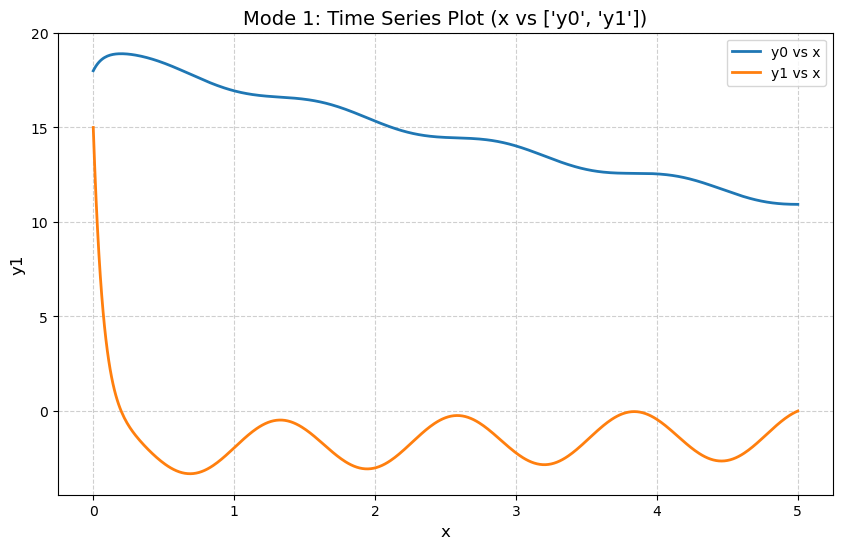

In [23]:
plot_solver_result(df_rk4, mode=1, col1='x', col2=['y0','y1'])

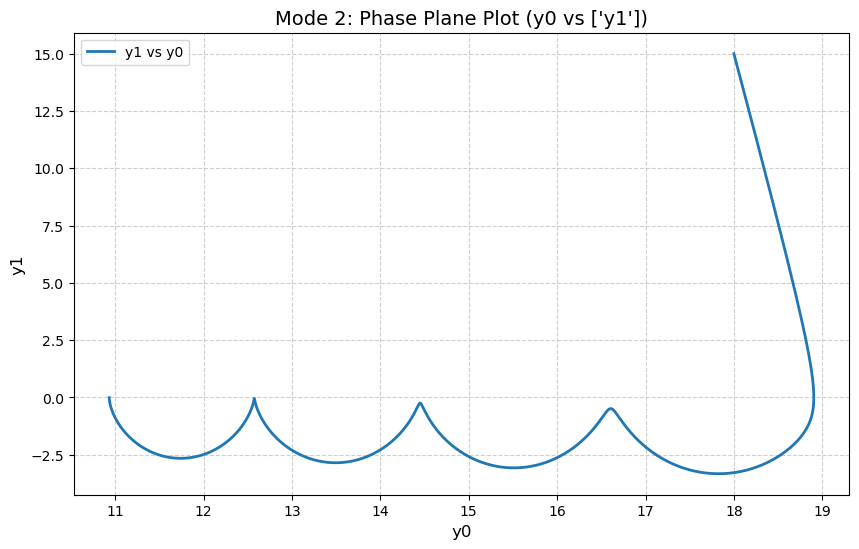

In [21]:
plot_solver_result(df_rk4, mode=2, col1='y0', col2=['y1'])